There are basically three types of recommender systems:-

* **Demographic Filtering-** They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

* **Content Based Filtering-** They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
* **Collaborative Filtering-** This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

# Import Library and Dataset

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [57]:
df1=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

# Data Exploration

The first dataset contains the following features:-

* **movie_id -** A unique identifier for each movie.
* **cast -** The name of lead and supporting actors.
* **crew -** The name of Director, Editor, Composer, Writer etc.
* **title -** The titles for the movies.

In [58]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The second dataset has the following features:-

* **budget -** The budget in which the movie was made.
* **genre -** The genre of the movie, Action, Comedy ,Thriller etc.
* **homepage -** A link to the homepage of the movie.
* **id -** This is infact the movie_id as in the first dataset.
* **keywords -** The keywords or tags related to the movie.
* **original_language -** The language in which the movie was made.
* **original_title -** The title of the movie before translation or adaptation.
* **overview -** A brief description of the movie.
* **popularity -** A numeric quantity specifying the movie popularity.
* **production_companies -** The production house of the movie.
* **production_countries -** The country in which it was produced.
* **release_date -** The date on which it was released.
* **revenue -** The worldwide revenue generated by the movie.
* **runtime -** The running time of the movie in minutes.
* **status -** "Released" or "Rumored".
* **tagline -** Movie's tagline.
* **title -** Title of the movie.
* **vote_average -** average ratings the movie recieved.
* **vote_count -** the count of votes recieved.

In [59]:
df2.head()[:3]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


**Let's join the two dataset on the 'id' column**

In [60]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [61]:
df2.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5 non-null      int64  
 1   genres                5 non-null      object 
 2   homepage              5 non-null      object 
 3   id                    5 non-null      int64  
 4   keywords              5 non-null      object 
 5   original_language     5 non-null      object 
 6   original_title        5 non-null      object 
 7   overview              5 non-null      object 
 8   popularity            5 non-null      float64
 9   production_companies  5 non-null      object 
 10  production_countries  5 non-null      object 
 11  release_date          5 non-null      object 
 12  revenue               5 non-null      int64  
 13  runtime               5 non-null      float64
 14  spoken_languages      5 non-null      object 
 15  status                5 non

# Demographic Filtering

Before getting started with this -

* we need a metric to score or rate movie
* Calculate the score for every movie
* Sort the scores and recommend the best rated movie to the users.

Weighted Rating = (v/(v+m))xR + (m/(v+m))xC

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [62]:
df2['vote_count'][:5]

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [63]:
df2['vote_average'][:5]

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [64]:
C=df2['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [65]:
m=df2['vote_count'].quantile(0.9)
m

1838.4000000000015

**Now, we can filter out the movies that qualify for the chart**

In [66]:
q_movies=df2.copy().loc[df2['vote_count'] >=m]
q_movies.shape

(481, 23)

In [67]:
q_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 4602
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                481 non-null    int64  
 1   genres                481 non-null    object 
 2   homepage              349 non-null    object 
 3   id                    481 non-null    int64  
 4   keywords              481 non-null    object 
 5   original_language     481 non-null    object 
 6   original_title        481 non-null    object 
 7   overview              481 non-null    object 
 8   popularity            481 non-null    float64
 9   production_companies  481 non-null    object 
 10  production_countries  481 non-null    object 
 11  release_date          481 non-null    object 
 12  revenue               481 non-null    int64  
 13  runtime               481 non-null    float64
 14  spoken_languages      481 non-null    object 
 15  status                481 n

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [68]:
def weighted_rating(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    # Calculation based on the IMDB formula
    #baysian estimate
    return (v/(v+m)*R) + (m/(m+v)*C)

In [69]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`

q_movies['score'] = q_movies.apply(weighted_rating,axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [70]:
q_movies['score']

0       7.050669
1       6.665696
2       6.239396
3       7.346721
4       6.096368
          ...   
4291    6.693677
4300    7.366378
4302    7.210428
4337    7.198026
4602    7.210563
Name: score, Length: 481, dtype: float64

In [71]:
# Sort movies based on score calculated
q_movies=q_movies.sort_values('score',ascending=False)

**Top 10 Movies**

In [72]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


**Visualization**

Text(0.5, 1.0, 'Popular Movies')

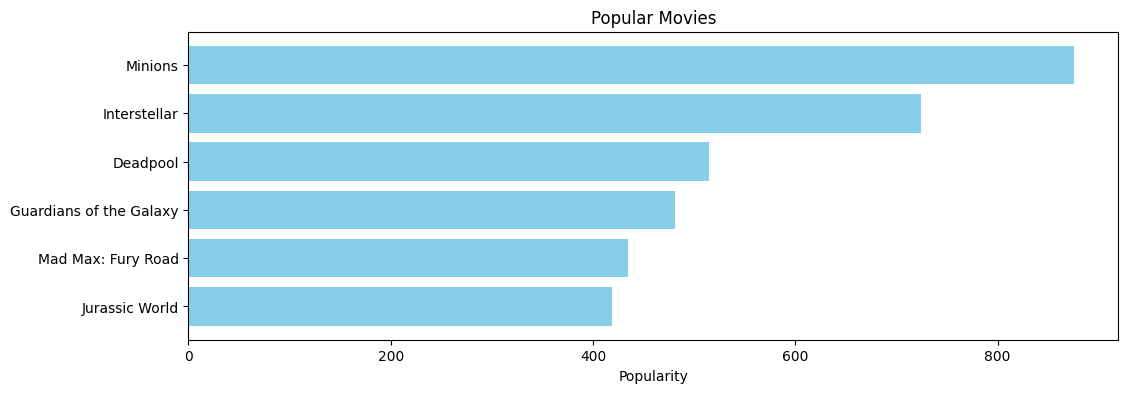

In [73]:
pop=df2.sort_values('popularity',ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# Content Based Recommender

In [74]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

**TF-IDF matrix**

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words='english')

df2['overview'] = df2['overview'].fillna('')

tfidf_matrix=tfidf.fit_transform(df2['overview'])

In [76]:
tfidf_matrix.shape

(4803, 20978)

In [77]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [78]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [79]:
linear_kernel(tfidf_matrix,tfidf_matrix)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

<Axes: >

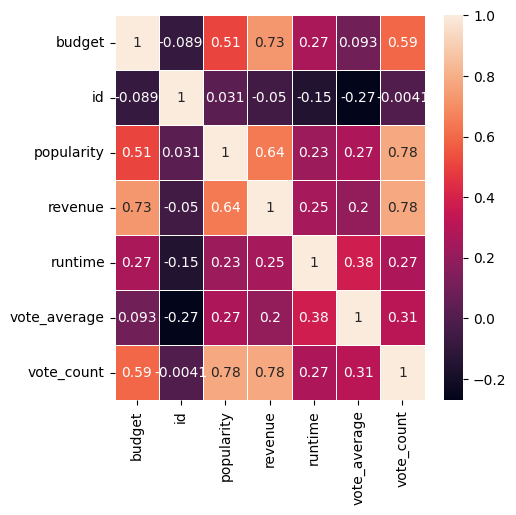

In [80]:
plt.figure(figsize=(5,5))
numeric_df2 = df2.select_dtypes(include=['number'])
sns.heatmap(numeric_df2.corr(),annot=True,linewidth=0.5)

In [81]:
#Construct a reverse map of indices and movie titles

indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [82]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [83]:
# Function that takes in movie title as input and outputs most similar movies

def get_recommendations(title,cosine_sim=cosine_sim):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x: x[1], reverse=True)
    sim_scores=sim_scores[1:11]
    movie_indices=[i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]

**Trial Recommendation**

In [84]:
get_recommendations('Minions')

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
2511                               Home Alone
3944                                  Freeway
2892                        Darling Companion
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
1733                        The Spy Next Door
70                             Wild Wild West
Name: title, dtype: object

In [85]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

**Credits, Genres and Keywords Based Recommender**

In [86]:
# Parse the stringified features into their corresponding python objects

from ast import literal_eval

features=['cast','crew','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [87]:
df2[feature]

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
4798    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4799    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4801                                                   []
4802                  [{'id': 99, 'name': 'Documentary'}]
Name: genres, Length: 4803, dtype: object

In [88]:
# Get the director's name from the crew feature. If director is not listed, return NaN

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [89]:
# Returns the list top 3 elements or entire list; whichever is more.

def get_list(x):
    if isinstance(x,list):
        names=[i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names
    #Return empty list in case of missing/malformed data
    return []

In [90]:
# Define new director, cast, genres and keywords features that are in a suitable form.

df2['director'] = df2['crew'].apply(get_director)

features=['cast','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)
    

In [91]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [92]:
# Function to convert all strings to lower case and strip names of spaces

def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x,str):
            return str.lower(x.replace(" ",""))
        else:
            return ''

In [93]:
# Apply clean_data function to your features.

features=['cast','keywords','director','genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [94]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1)

In [95]:
# Import CountVectorizer and create the count matrix

from sklearn.feature_extraction.text import CountVectorizer

count=CountVectorizer(stop_words='english')
count_matrix=count.fit_transform(df2['soup'])

In [96]:
# Compute the Cosine Similarity matrix based on the count_matrix

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2=cosine_similarity(count_matrix, count_matrix)

In [97]:
# Reset index of our main DataFrame and construct reverse mapping as before

df2=df2.reset_index()
indices=pd.Series(df2.index, index=df2['title'])

In [98]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [99]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

# Collaborative Recommendations

title
Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
John Carter
Spider-Man 3
Tangled
Avengers: Age of Ultron
Harry Potter and the Half-Blood Prince
Batman v Superman: Dawn of Justice
Superman Returns
Quantum of Solace
Pirates of the Caribbean: Dead Man's Chest
The Lone Ranger
Man of Steel
The Chronicles of Narnia: Prince Caspian
The Avengers
Pirates of the Caribbean: On Stranger Tides
Men in Black 3
The Hobbit: The Battle of the Five Armies
The Amazing Spider-Man
Robin Hood
The Hobbit: The Desolation of Smaug
The Golden Compass
King Kong
Titanic
Captain America: Civil War
Battleship
Jurassic World
 ""gender"": 0
Skyfall
Spider-Man 2
Iron Man 3
Alice in Wonderland
X-Men: The Last Stand
Monsters University
Transformers: Revenge of the Fallen
Transformers: Age of Extinction
Oz: The Great and Powerful
The Amazing Spider-Man 2
TRON: Legacy
Cars 2
Green Lantern
Toy Story 3
Terminator Salvation
Furious 7
World War Z
X-Men: Days of Future Past
Star Trek Into Darkness
Jack the Giant Slayer
The Great Gatsby
Prince of Persia: The Sands of Time
Pacific Rim
Transformers: Dark of the Moon
Indiana Jones and the Kingdom of the Crystal Skull
The Good Dinosaur
Brave
Star Trek Beyond
WALL·E
Rush Hour 3
2012
A Christmas Carol
Jupiter Ascending
The Legend of Tarzan
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe
X-Men: Apocalypse
The Dark Knight
Up
Monsters vs Aliens
Iron Man
Hugo
Wild Wild West
The Mummy: Tomb of the Dragon Emperor
Suicide Squad
Evan Almighty
Edge of Tomorrow
Waterworld
G.I. Joe: The Rise of Cobra
Inside Out
The Jungle Book
Iron Man 2
Snow White and the Huntsman
Maleficent
Dawn of the Planet of the Apes
The Lovers
47 Ronin
Captain America: The Winter Soldier
Shrek Forever After
Tomorrowland
Big Hero 6
Wreck-It Ralph
The Polar Express
Independence Day: Resurgence
How to Train Your Dragon
Terminator 3: Rise of the Machines
Guardians of the Galaxy
Interstellar
Inception
Shin Godzilla


In [104]:
Movie_Name = str(input("Enter Movie Name : "))
print("Recommend Movie : ")
get_recommendations(Movie_Name, cosine_sim2)

Enter Movie Name :  The Avengers


Recommend Movie : 


7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object